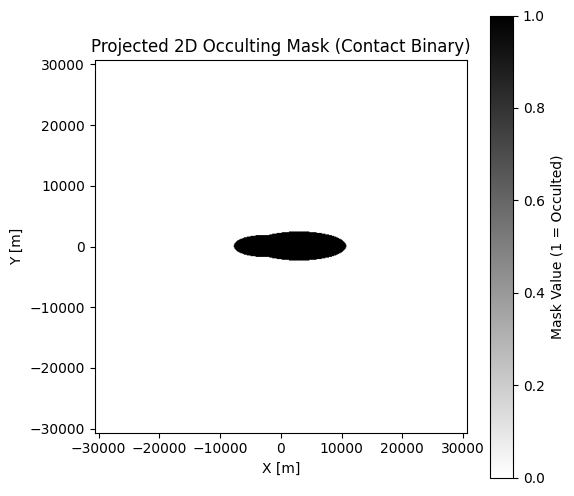

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- Constants and Grid (same as before) ---
c = 2.998e8
h = 6.626e-34
au = 1.496e11

wavelength = 445e-9
D_kbo = 43 * au
r_f = np.sqrt(wavelength * D_kbo / 2)

N = 512
dx = r_f / 10
L = N * dx
x = np.linspace(-L/2, L/2, N)
y = np.linspace(-L/2, L/2, N)
X, Y = np.meshgrid(x, y)

# --- Ellipsoid Parameters in Meters ---
sep = 50 * dx
a1, b1 = 40 * dx, 15 * dx
a2, b2 = 65 * dx, 20 * dx
x1 = -sep / 2
x2 = +sep / 2

# --- Generate Binary Mask ---
mask1 = ((X - x1)**2 / a1**2 + Y**2 / b1**2) <= 1
mask2 = ((X - x2)**2 / a2**2 + Y**2 / b2**2) <= 1
mask_total = mask1 | mask2

# --- Plot the Mask ---
plt.figure(figsize=(6, 6))
plt.imshow(mask_total, cmap='gray_r', extent=[x.min(), x.max(), y.min(), y.max()])
plt.title("Projected 2D Occulting Mask (Contact Binary)")
plt.xlabel("X [m]")
plt.ylabel("Y [m]")
plt.colorbar(label="Mask Value (1 = Occulted)")
plt.grid(False)
plt.show()

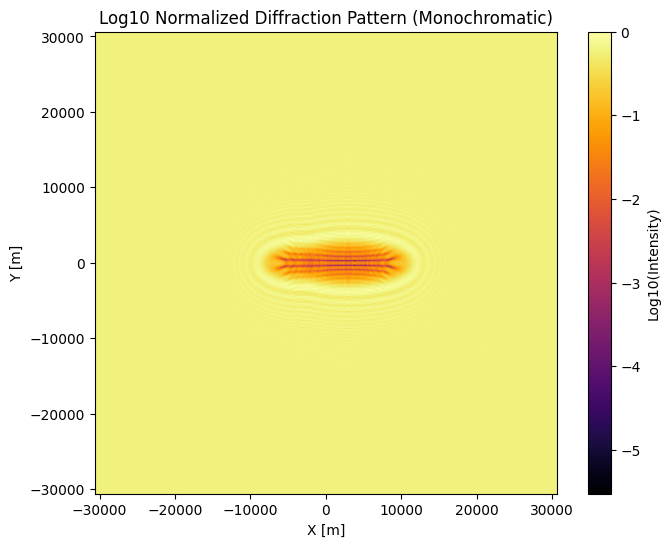

In [ ]:
# --- Fresnel Kernel Setup ---
fx = np.fft.fftfreq(N, d=dx)
FX, FY = np.meshgrid(fx, fx)
H = np.exp(-1j * np.pi * wavelength * D_kbo * (FX**2 + FY**2))  # Fresnel transfer function

# --- Incident Wave and Mask Application ---
wavefront = np.ones_like(X, dtype=complex)
wavefront[mask_total] = 0.0  # block light where mask = True

# --- Fresnel Propagation via FFT ---
U1 = np.fft.fft2(wavefront)
U2 = U1 * H
U3 = np.fft.ifft2(U2)
intensity = np.abs(U3)**2

# --- Normalize and Plot ---
intensity /= np.max(intensity)

plt.figure(figsize=(8, 6))
plt.imshow(np.log10(intensity), cmap='inferno', extent=[x.min(), x.max(), y.min(), y.max()])
plt.title("Log10 Normalized Diffraction Pattern (Monochromatic)")
plt.xlabel("X [m]")
plt.ylabel("Y [m]")
cbar = plt.colorbar()
cbar.set_label("Log10(Intensity)")
plt.grid(False)
plt.show()

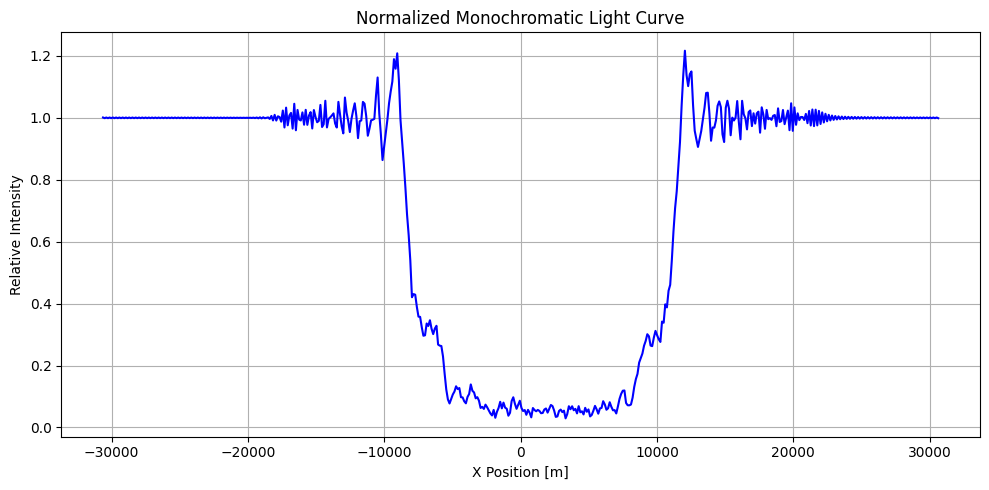

In [ ]:
# --- Extract 1D Light Curve from Center Row ---
intensity_line = intensity[N // 2, :]  # Take the middle row (y = 0 line)

# --- Normalize Using Baseline (edges of the domain) ---
baseline = np.median(np.concatenate([intensity_line[:50], intensity_line[-50:]]))
intensity_line /= baseline

# --- Plot the Light Curve ---
plt.figure(figsize=(10, 5))
plt.plot(x, intensity_line, color='blue')
plt.title("Normalized Monochromatic Light Curve")
plt.xlabel("X Position [m]")
plt.ylabel("Relative Intensity")
plt.grid(True)
plt.tight_layout()
plt.show()

## Full Code

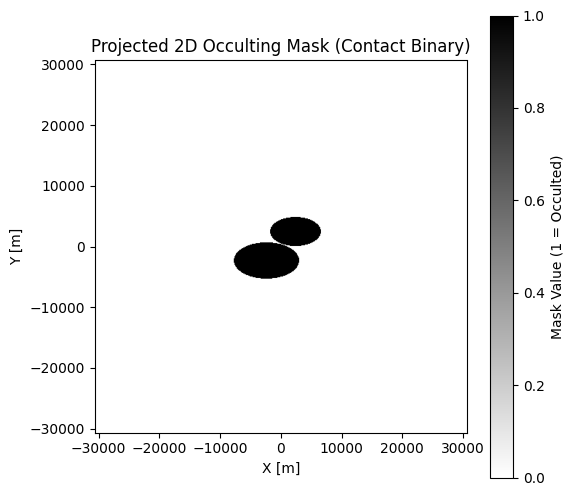

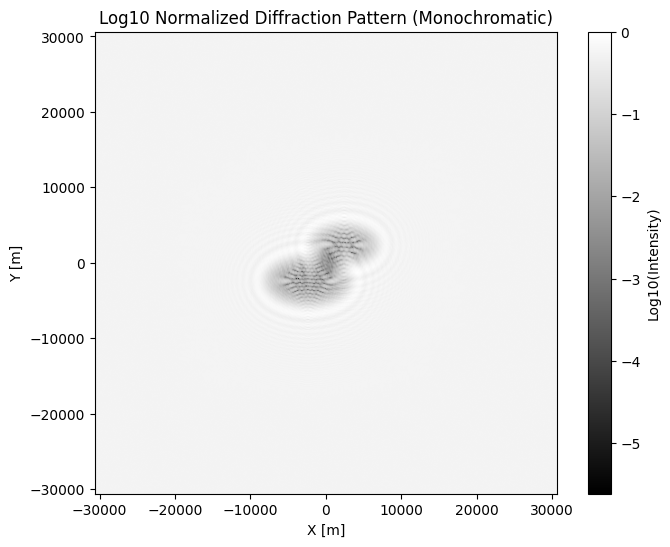

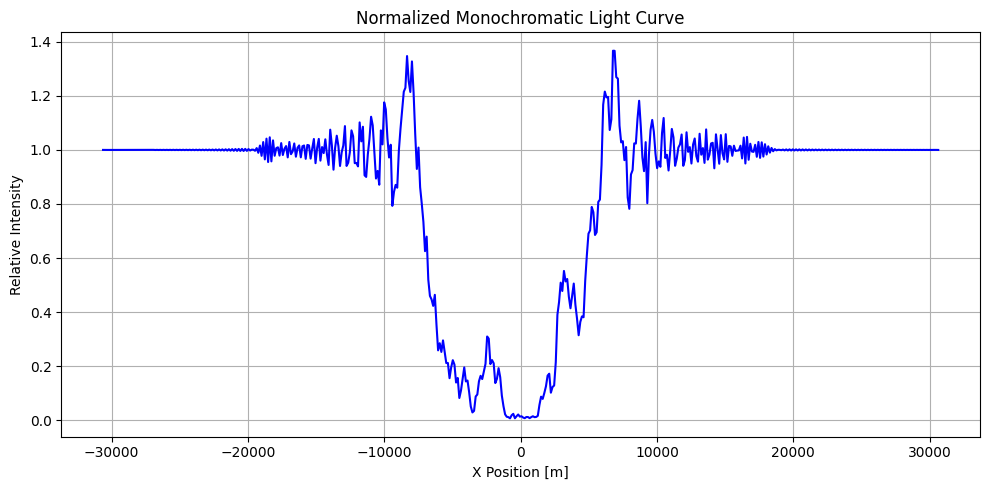

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- Constants and Grid (same as before) ---
c = 2.998e8
h = 6.626e-34
au = 1.496e11

wavelength = 445e-9
D_kbo = 43 * au
r_f = np.sqrt(wavelength * D_kbo / 2)

N = 512
dx = r_f / 10
L = N * dx
x = np.linspace(-L/2, L/2, N)
y = np.linspace(-L/2, L/2, N)
X, Y = np.meshgrid(x, y)

# --- Ellipsoid Parameters in Meters ---
sep = 40 * dx
a1, b1 = 45 * dx, 25 * dx # ellipsoid 1 axes
a2, b2 = 35 * dx, 20 * dx # ellipsoid 2 axes
x1 = -sep / 2
x2 = +sep / 2
y1 = 20 * dx  # Move Ellipsoid 1
y2 = -20 * dx  # Move Ellipsoid 2

# --- Generate Binary Mask ---
mask1 = ((X - x1)**2 / a1**2 + (Y - y1)**2 / b1**2) <= 1
mask2 = ((X - x2)**2 / a2**2 + (Y - y2)**2 / b2**2) <= 1
mask_total = mask1 | mask2

# --- Plot the Mask ---
plt.figure(figsize=(6, 6))
plt.imshow(mask_total, cmap='gray_r', extent=[x.min(), x.max(), y.min(), y.max()])
plt.title("Projected 2D Occulting Mask (Contact Binary)")
plt.xlabel("X [m]")
plt.ylabel("Y [m]")
plt.colorbar(label="Mask Value (1 = Occulted)")
plt.grid(False)
plt.show()

#################################### Diffraction Profile ####################################

# --- Fresnel Kernel Setup ---
fx = np.fft.fftfreq(N, d=dx)
FX, FY = np.meshgrid(fx, fx)
H = np.exp(-1j * np.pi * wavelength * D_kbo * (FX**2 + FY**2))  # Fresnel transfer function

# --- Incident Wave and Mask Application ---
wavefront = np.ones_like(X, dtype=complex)
wavefront[mask_total] = 0.0  # block light where mask = True

# --- Fresnel Propagation via FFT ---
U1 = np.fft.fft2(wavefront)
U2 = U1 * H
U3 = np.fft.ifft2(U2)
intensity = np.abs(U3)**2

# --- Normalize and Plot ---
intensity /= np.max(intensity)

plt.figure(figsize=(8, 6))
plt.imshow(np.log10(intensity), cmap='gray', extent=[x.min(), x.max(), y.min(), y.max()])
plt.title("Log10 Normalized Diffraction Pattern (Monochromatic)")
plt.xlabel("X [m]")
plt.ylabel("Y [m]")
cbar = plt.colorbar()
cbar.set_label("Log10(Intensity)")
plt.grid(False)
plt.show()


#################################### Light Curve ####################################

# --- Extract 1D Light Curve from Center Row ---
intensity_line = intensity[N // 2, :]  # Take the middle row (y = 0 line)

# --- Normalize Using Baseline (edges of the domain) ---
baseline = np.median(np.concatenate([intensity_line[:50], intensity_line[-50:]]))
intensity_line /= baseline

# --- Plot the Light Curve ---
plt.figure(figsize=(10, 5))
plt.plot(x, intensity_line, color='blue')
plt.title("Normalized Monochromatic Light Curve")
plt.xlabel("X Position [m]")
plt.ylabel("Relative Intensity")
plt.grid(True)
plt.tight_layout()
plt.show()



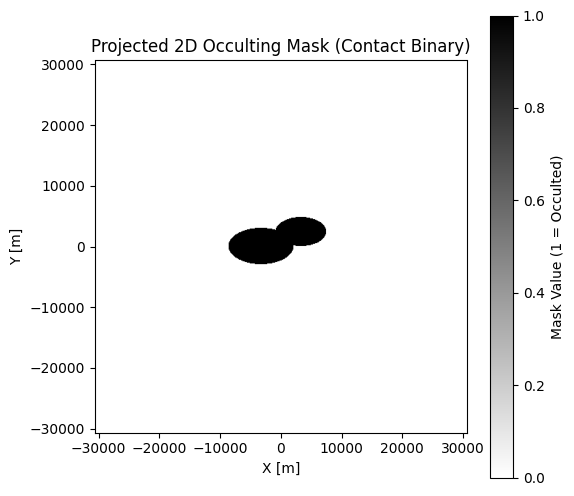

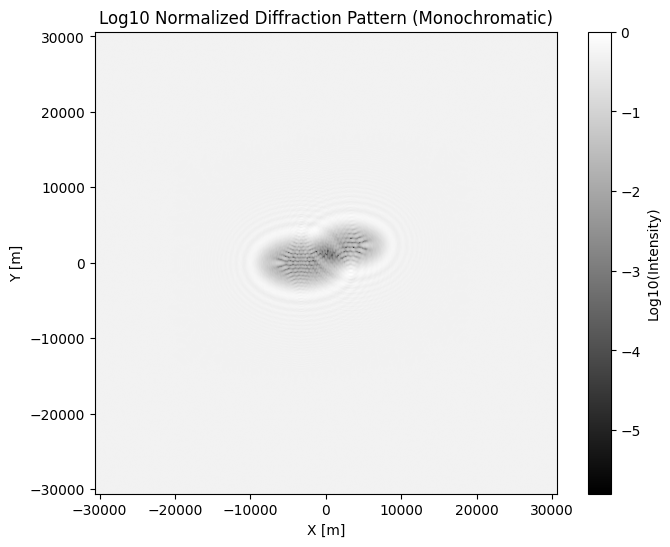

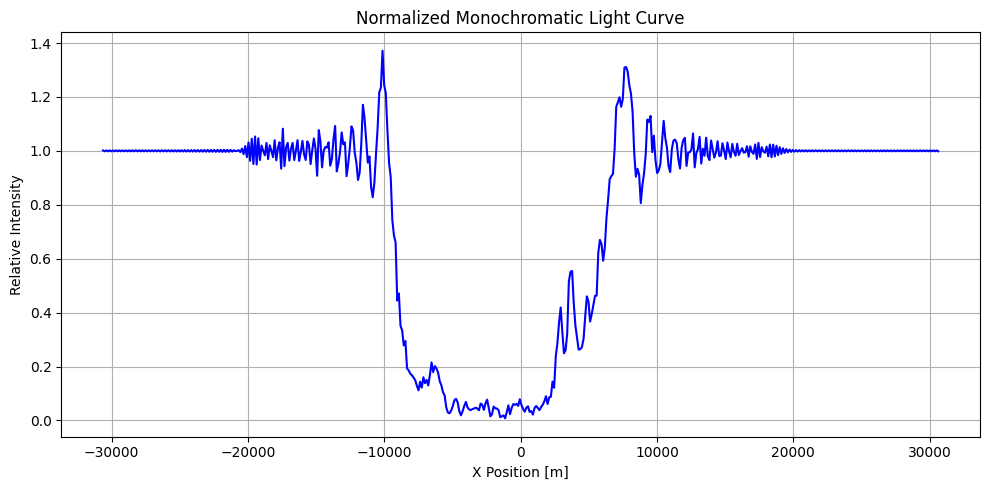

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- Physical constants and observing parameters ---
c = 2.998e8          # Speed of light [m/s]
h = 6.626e-34        # Planck’s constant [J·s]
au = 1.496e11        # Astronomical unit [m]
wavelength = 445e-9  # B-band center [m]
D_kbo = 43 * au      # Distance to KBO [m]
r_f = np.sqrt(wavelength * D_kbo / 2)  # Fresnel scale

# --- Grid setup ---
N = 512
dx = r_f / 10
L = N * dx
x = np.linspace(-L/2, L/2, N)
y = np.linspace(-L/2, L/2, N)
X, Y = np.meshgrid(x, y)

# --- Ellipsoid parameters ---
sep = 55 * dx
a1, b1 = 45 * dx, 25 * dx
a2, b2 = 35 * dx, 20 * dx
x1, y1 = -sep / 2, 0
x2, y2 = +sep / 2, -20 * dx

# Optional rotation (angle in radians)
theta = np.radians(30)
X1r = np.cos(theta)*(X - x1) + np.sin(theta)*(Y - y1)
Y1r = -np.sin(theta)*(X - x1) + np.cos(theta)*(Y - y1)
X2r = np.cos(theta)*(X - x2) + np.sin(theta)*(Y - y2)
Y2r = -np.sin(theta)*(X - x2) + np.cos(theta)*(Y - y2)
mask1 = (X1r**2 / a1**2 + Y1r**2 / b1**2) <= 1
mask2 = (X2r**2 / a2**2 + Y2r**2 / b2**2) <= 1

# --- Generate binary mask without rotation ---
mask1 = ((X - x1)**2 / a1**2 + (Y - y1)**2 / b1**2) <= 1
mask2 = ((X - x2)**2 / a2**2 + (Y - y2)**2 / b2**2) <= 1
mask_total = mask1 | mask2

# --- Plot the 2D occulting mask ---
plt.figure(figsize=(6, 6))
plt.imshow(mask_total, cmap='gray_r', extent=[x.min(), x.max(), y.min(), y.max()])
plt.title("Projected 2D Occulting Mask (Contact Binary)")
plt.xlabel("X [m]")
plt.ylabel("Y [m]")
plt.colorbar(label="Mask Value (1 = Occulted)")
plt.grid(False)
plt.show()

# --- Fresnel propagation ---
fx = np.fft.fftfreq(N, d=dx)
FX, FY = np.meshgrid(fx, fx)
H = np.exp(-1j * np.pi * wavelength * D_kbo * (FX**2 + FY**2))

wavefront = np.ones_like(X, dtype=complex)
wavefront[mask_total] = 0.0

U1 = np.fft.fft2(wavefront)
U2 = U1 * H
U3 = np.fft.ifft2(U2)
intensity = np.abs(U3)**2
intensity /= np.max(intensity)

# --- Plot diffraction pattern ---
plt.figure(figsize=(8, 6))
plt.imshow(np.log10(intensity), cmap='gray', extent=[x.min(), x.max(), y.min(), y.max()])
plt.title("Log10 Normalized Diffraction Pattern (Monochromatic)")
plt.xlabel("X [m]")
plt.ylabel("Y [m]")
plt.colorbar(label="Log10(Intensity)")
plt.grid(False)
plt.show()

# --- Extract and plot 1D light curve ---
intensity_line = intensity[N // 2, :]
baseline = np.median(np.concatenate([intensity_line[:50], intensity_line[-50:]]))
intensity_line /= baseline

plt.figure(figsize=(10, 5))
plt.plot(x, intensity_line, color='blue')
plt.title("Normalized Monochromatic Light Curve")
plt.xlabel("X Position [m]")
plt.ylabel("Relative Intensity")
plt.grid(True)
plt.tight_layout()
plt.show()


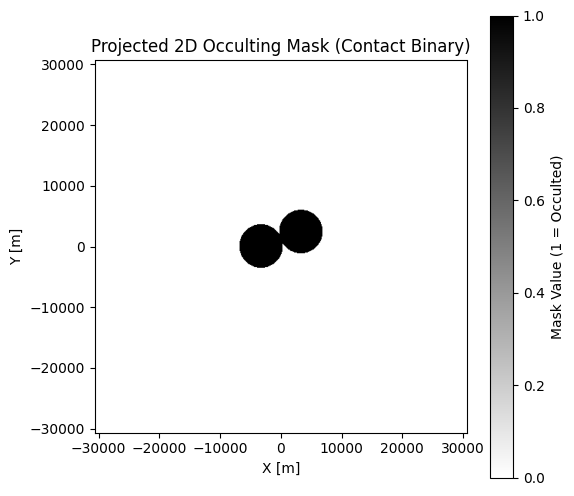

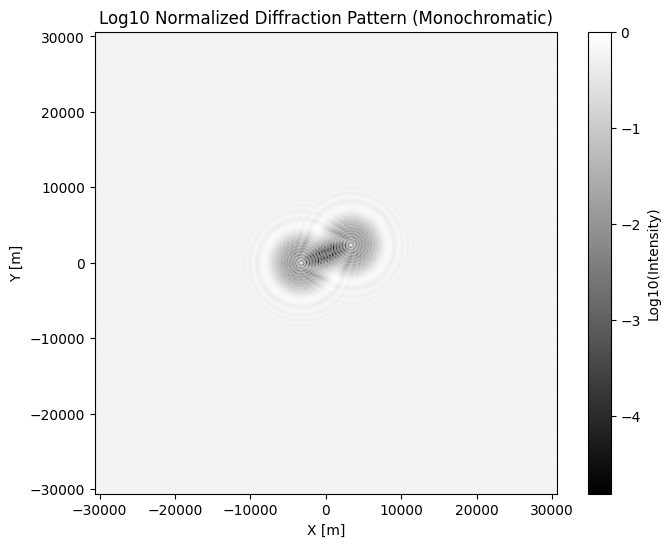

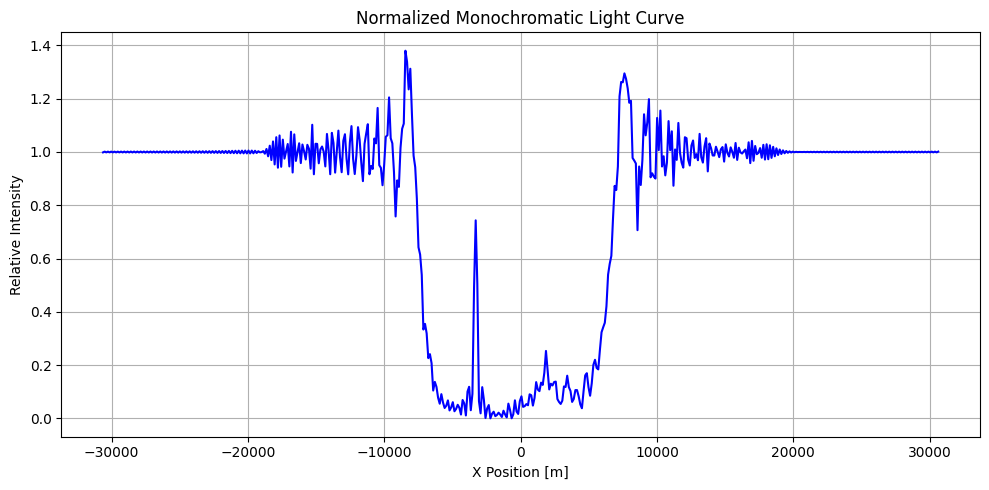

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- Physical constants and observing parameters ---
c = 2.998e8          # Speed of light [m/s]
h = 6.626e-34        # Planck’s constant [J·s]
au = 1.496e11        # Astronomical unit [m]
wavelength = 445e-9  # B-band center [m]
D_kbo = 43 * au      # Distance to KBO [m]
r_f = np.sqrt(wavelength * D_kbo / 2)  # Fresnel scale

# --- Grid setup ---
N = 512
dx = r_f / 10
L = N * dx
x = np.linspace(-L/2, L/2, N)
y = np.linspace(-L/2, L/2, N)
X, Y = np.meshgrid(x, y)

# --- Ellipsoid parameters ---
sep = 55 * dx
a1, b1 = 30 * dx, 30 * dx
a2, b2 = 30 * dx, 30 * dx
x1, y1 = -sep / 2, 0
x2, y2 = +sep / 2, -20 * dx

# ---------------- Optional: Apply rotation to both ellipsoids ----------------
# theta = np.radians(20)  # Rotation angle in degrees converted to radians

# Rotate coordinates of ellipsoid 1
# X1r = np.cos(theta)*(X - x1) + np.sin(theta)*(Y - y1)   # X' for ellipsoid 1
# Y1r = -np.sin(theta)*(X - x1) + np.cos(theta)*(Y - y1)  # Y' for ellipsoid 1

# Rotate coordinates of ellipsoid 2
# X2r = np.cos(theta)*(X - x2) + np.sin(theta)*(Y - y2)   # X' for ellipsoid 2
# Y2r = -np.sin(theta)*(X - x2) + np.cos(theta)*(Y - y2)  # Y' for ellipsoid 2

# Create rotated masks (use these if rotation is enabled)
# mask1 = (X1r**2 / a1**2 + Y1r**2 / b1**2) <= 1
# mask2 = (X2r**2 / a2**2 + Y2r**2 / b2**2) <= 1

# ---------------- Default (non-rotated) mask ----------------
mask1 = ((X - x1)**2 / a1**2 + (Y - y1)**2 / b1**2) <= 1
mask2 = ((X - x2)**2 / a2**2 + (Y - y2)**2 / b2**2) <= 1
mask_total = mask1 | mask2

# --- Plot the 2D occulting mask ---
plt.figure(figsize=(6, 6))
plt.imshow(mask_total, cmap='gray_r', extent=[x.min(), x.max(), y.min(), y.max()])
plt.title("Projected 2D Occulting Mask (Contact Binary)")
plt.xlabel("X [m]")
plt.ylabel("Y [m]")
plt.colorbar(label="Mask Value (1 = Occulted)")
plt.grid(False)
plt.show()

# --- Fresnel propagation kernel ---
fx = np.fft.fftfreq(N, d=dx)
FX, FY = np.meshgrid(fx, fx)
H = np.exp(-1j * np.pi * wavelength * D_kbo * (FX**2 + FY**2))  # Fresnel transfer function

# --- Incident wavefront and propagation ---
wavefront = np.ones_like(X, dtype=complex)
wavefront[mask_total] = 0.0  # Block light where the mask is true

U1 = np.fft.fft2(wavefront)   # FFT of the wavefront
U2 = U1 * H                   # Apply Fresnel transfer function
U3 = np.fft.ifft2(U2)         # Inverse FFT to get propagated field
intensity = np.abs(U3)**2     # Intensity = |U|^2
intensity /= np.max(intensity)  # Normalize

# --- Plot the diffraction pattern ---
plt.figure(figsize=(8, 6))
plt.imshow(np.log10(intensity), cmap='gray', extent=[x.min(), x.max(), y.min(), y.max()])
plt.title("Log10 Normalized Diffraction Pattern (Monochromatic)")
plt.xlabel("X [m]")
plt.ylabel("Y [m]")
plt.colorbar(label="Log10(Intensity)")
plt.grid(False)
plt.show()

# --- Extract and plot the light curve ---
intensity_line = intensity[N // 2, :]  # Horizontal cut through center (y = 0)
baseline = np.median(np.concatenate([intensity_line[:50], intensity_line[-50:]]))  # Normalize using edges
intensity_line /= baseline

plt.figure(figsize=(10, 5))
plt.plot(x, intensity_line, color='blue')
plt.title("Normalized Monochromatic Light Curve")
plt.xlabel("X Position [m]")
plt.ylabel("Relative Intensity")
plt.grid(True)
plt.tight_layout()
plt.show()



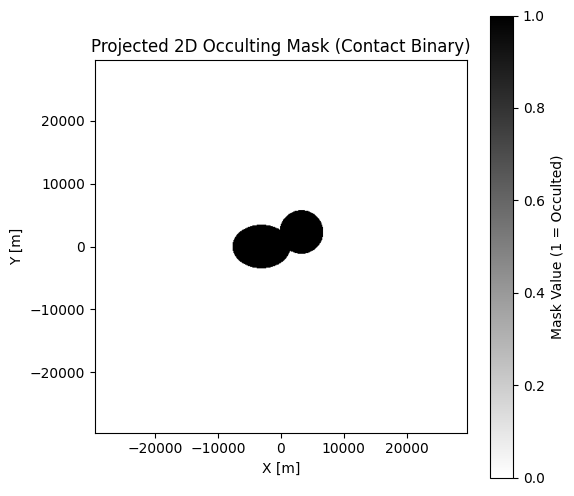

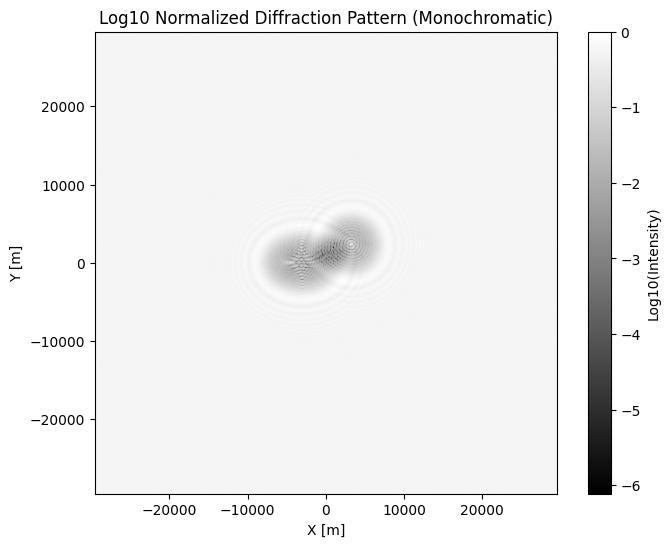

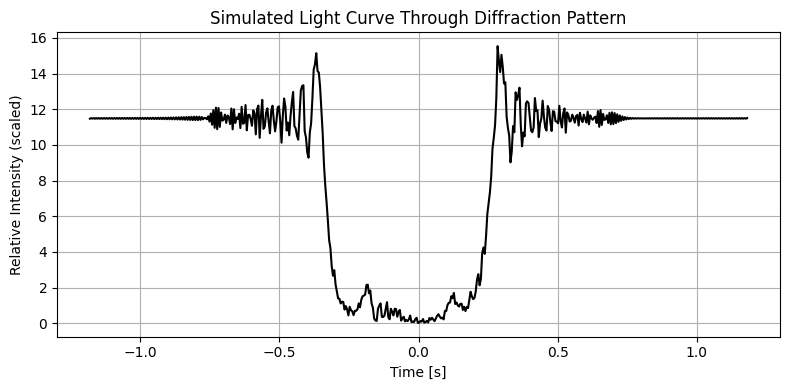

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ------------------------------
# PHYSICAL CONSTANTS AND GEOMETRY
# ------------------------------
h = 6.626e-27       # Planck's constant in erg·s
c = 2.998e8         # Speed of light in m/s
au = 1.496e11       # Astronomical unit in meters
rsun = 6.957e8      # Radius of the Sun in meters

# --- Geometry ---
do = 40 * au              # Distance to occulting object (KBO) [m]
ao = 600.0                # Radius of occulting object [m]
as_ = 8.0 * rsun          # Radius of the star [m]

# --- Wavelength and Filter Band ---
lb = 445e-9               # Central B-band wavelength [m]
lambda0 = lb

# --- Target Angular Size of Star (arcsec) and Conversion to Radians ---
target_angsize_arcsec = 0.01
target_angsize_rad = target_angsize_arcsec * (np.pi / 180) / 3600

# --- Compute Star Distance from Angular Size and Radius ---
ds = 2.0 * as_ / target_angsize_rad  # [m]

# ------------------------------
# FRESNEL SCALE AND DIMENSIONLESS PARAMETERS
# ------------------------------
fs = np.sqrt(lambda0 * do / 2)       # Fresnel scale [m]

rho = ao / fs                        # Occulter radius in Fresnel units
theta_o_mas = (ao / do) * (180/np.pi) * 3600 * 1000   # Occulter angular diameter in mas
theta_s_mas = (as_ / ds) * (180/np.pi) * 3600 * 1000  # Star angular diameter in mas
epsilon = (ao / do) / (as_ / ds)     # Angular size ratio (occulting object / star)
rho_star = (as_ / ds) * do / fs      # Stellar radius in Fresnel units

# ------------------------------
# VERITAS INSTRUMENTAL PARAMETERS
# ------------------------------
areaveritas = np.pi * (12 / 2)**2              # Mirror area (12 m dia) in m²
optthroughputveritas = 0.6                     # Optical throughput
qeveritas = 0.3                                # PMT quantum efficiency
throughputveritas = optthroughputveritas * qeveritas  # Total system efficiency
rdnoiseveritas = 0.1 * 9                       # Photoelectron noise
omegapixveritas = np.pi * (0.15 / 2)**2        # Pixel solid angle in deg²
omegapix_arcsec2 = omegapixveritas * (3600**2) # Convert to arcsec²

# ------------------------------
# GRID SETUP FOR SIMULATION
# ------------------------------
N = 512
dx = fs / 10         # Grid spacing ~ Fresnel scale / 10
L = N * dx
x = np.linspace(-L/2, L/2, N)
y = np.linspace(-L/2, L/2, N)
X, Y = np.meshgrid(x, y)

# ------------------------------
# GENERATE ELLIPSOIDAL MASK (CONTACT BINARY SHAPE)
# ------------------------------
sep = 55 * dx
a1, b1 = 40 * dx, 30 * dx
a2, b2 = 30 * dx, 30 * dx
x1, y1 = -sep / 2, 0 * dx
x2, y2 = +sep / 2, -20 * dx

mask1 = ((X - x1)**2 / a1**2 + (Y - y1)**2 / b1**2) <= 1
mask2 = ((X - x2)**2 / a2**2 + (Y - y2)**2 / b2**2) <= 1
mask_total = mask1 | mask2

# --- Plot the Mask ---
plt.figure(figsize=(6, 6))
plt.imshow(mask_total, cmap='gray_r', extent=[x.min(), x.max(), y.min(), y.max()])
plt.title("Projected 2D Occulting Mask (Contact Binary)")
plt.xlabel("X [m]")
plt.ylabel("Y [m]")
plt.colorbar(label="Mask Value (1 = Occulted)")
plt.grid(False)
plt.show()

# ------------------------------
# FRESNEL DIFFRACTION SIMULATION
# ------------------------------
fx = np.fft.fftfreq(N, d=dx)
FX, FY = np.meshgrid(fx, fx)
H = np.exp(-1j * np.pi * lambda0 * do * (FX**2 + FY**2))  # Fresnel Transfer Function

# --- Incident Plane Wave Blocked by Mask ---
wavefront = np.ones_like(X, dtype=complex)
wavefront[mask_total] = 0.0

# --- Fresnel Propagation via FFT ---
U1 = np.fft.fft2(wavefront)
U2 = U1 * H
U3 = np.fft.ifft2(U2)
intensity = np.abs(U3)**2
intensity /= np.max(intensity)

# --- Plot Log10 Intensity Pattern ---
plt.figure(figsize=(8, 6))
plt.imshow(np.log10(intensity), cmap='gray', extent=[x.min(), x.max(), y.min(), y.max()])
plt.title("Log10 Normalized Diffraction Pattern (Monochromatic)")
plt.xlabel("X [m]")
plt.ylabel("Y [m]")
cbar = plt.colorbar()
cbar.set_label("Log10(Intensity)")
plt.grid(False)
plt.show()

# ------------------------------
# EXTRACT CENTRAL 1D LIGHT CURVE
# ------------------------------

# Extract 1D cut along Y = 0 (horizontal slice)
mid_index = N // 2
lightcurve = intensity[mid_index, :]

# Spatial coordinate along the cut (in meters)
x_profile = x  # same as the X-axis grid

# Optional: convert spatial distance to angular position (in mas)
# theta_x_mas = (x_profile / do) * (180/np.pi) * 3600 * 1000

# Optional: convert spatial distance to time assuming velocity
# occulter velocity projected = v_kbo [m/s]
v_kbo = 25e3  # sample value [m/s]
time_axis = x_profile / v_kbo  # [s]

# Scale by VERITAS throughput and collecting area (approx photon response)
# Not an absolute flux yet — use this to simulate relative detection scaling
scaled_lightcurve = lightcurve * areaveritas * throughputveritas

# ------------------------------
# PLOT LIGHT CURVE
# ------------------------------

plt.figure(figsize=(8, 4))
plt.plot(time_axis, scaled_lightcurve, color='black', lw=1.5)
plt.title("Simulated Light Curve Through Diffraction Pattern")
plt.xlabel("Time [s]")  # or use "Position [m]" if plotting x_profile instead
plt.ylabel("Relative Intensity (scaled)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# ===== Finite angular size smoothing and multi-type line plot =====
# Use point-source intensity already computed: `intensity` on grid (x,y).

import numpy as np
import matplotlib.pyplot as plt

def top_hat_kernel(radius_pix: float) -> np.ndarray:
    """Circular top-hat kernel with given radius in pixels (normalized to unit sum)."""
    r = max(1.0, float(radius_pix))
    R = int(np.ceil(r))
    yy, xx = np.mgrid[-R:R+1, -R:R+1]
    k = ((xx**2 + yy**2) <= r**2).astype(float)
    k /= k.sum()
    return k

def fft_convolve2d(img: np.ndarray, ker: np.ndarray) -> np.ndarray:
    """Fast FFT-based 2D convolution with wrap-free padding."""
    ny, nx = img.shape
    ky, kx = ker.shape
    pad_y, pad_x = ny + ky - 1, nx + kx - 1
    Fimg = np.fft.rfft2(img, s=(pad_y, pad_x))
    Fker = np.fft.rfft2(ker, s=(pad_y, pad_x))
    conv = np.fft.irfft2(Fimg * Fker, s=(pad_y, pad_x))
    # center-crop back to original size
    y0 = (ky - 1) // 2
    x0 = (kx - 1) // 2
    return conv[y0:y0+ny, x0:x0+nx]

# Approximate stellar angular diameters (milliarcsec) used in the paper’s examples
# giving a progression from small (A0V) to larger (M2V):
types = {
    "A0V": 0.013,   # mas
    "G5V": 0.040,   # mas
    "K5V": 0.100,   # mas
    "M2V": 0.180,   # mas
}

# Build smoothed profiles
profiles = {}
mid = N // 2
for label, theta_mas in types.items():
    theta_rad = theta_mas * 1e-3 * (np.pi / 180.0) / 3600.0      # mas -> rad
    r_star_m = 0.5 * theta_rad * do                               # projected star radius [m]
    r_star_pix = r_star_m / dx                                     # in pixels on the simulation grid
    K = top_hat_kernel(r_star_pix)
    I_smooth = fft_convolve2d(intensity, K)

    # extract central chord and baseline-normalize
    lc = I_smooth[mid, :].copy()
    baseline = np.median(np.r_[lc[:50], lc[-50:]])                 # edges as baseline
    lc_norm = lc / baseline
    profiles[label] = lc_norm

# Distance axis (convert to km for readability)
dist_km = x / 1e3

# Plot
plt.figure(figsize=(9,4.5))
for label, lc in profiles.items():
    plt.plot(dist_km, lc, lw=1.6, label=label)
plt.xlabel("Distance along chord (km)")
plt.ylabel("Normalized Intensity")
plt.title("Finite-Source Diffraction Profiles (V=12; A0V, G5V, K5V, M2V)")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

NameError: name 'do' is not defined

In [ ]:
# 1) Make the field larger so edges are far from the event
N = 768
dx = fs / 10
L  = N * dx

# 2) Heavier zero-padding in the FFT convolution to suppress wrap/edge bleed
def fft_convolve2d(img, ker):
    ny, nx = img.shape
    ky, kx = ker.shape
    pad_y, pad_x = 2*(ny+ky-1), 2*(nx+kx-1)   # was (ny+ky-1, nx+kx-1)
    Fimg = np.fft.rfft2(img, s=(pad_y, pad_x))
    Fker = np.fft.rfft2(ker, s=(pad_y, pad_x))
    conv = np.fft.irfft2(Fimg * Fker, s=(pad_y, pad_x))
    y0 = (ky-1)//2; x0 = (kx-1)//2
    return conv[y0:y0+ny, x0:x0+nx]

# 3) Take the central chord far from edges
mid = N // 2
lc = I_smooth[mid, :]

# 4) Baseline from a *middle far-field* window, not the ends
# (pick where |x| is well outside the Fresnel pattern but away from domain edges)
far = (np.abs(x) > 20e3) & (np.abs(x) < 0.8*L/2)   # tweak 20 km as needed
baseline = np.median(lc[far])
lc_norm = lc / baseline


In [ ]:
# 1) Make the field larger so edges are far from the event
N = 768
dx = fs / 10
L  = N * dx

# 2) Heavier zero-padding in the FFT convolution to suppress wrap/edge bleed
def fft_convolve2d(img, ker):
    ny, nx = img.shape
    ky, kx = ker.shape
    pad_y, pad_x = 2*(ny+ky-1), 2*(nx+kx-1)   # was (ny+ky-1, nx+kx-1)
    Fimg = np.fft.rfft2(img, s=(pad_y, pad_x))
    Fker = np.fft.rfft2(ker, s=(pad_y, pad_x))
    conv = np.fft.irfft2(Fimg * Fker, s=(pad_y, pad_x))
    y0 = (ky-1)//2; x0 = (kx-1)//2
    return conv[y0:y0+ny, x0:x0+nx]

# 3) Take the central chord far from edges
mid = N // 2
lc = I_smooth[mid, :]

# 4) Baseline from a *middle far-field* window, not the ends
# (pick where |x| is well outside the Fresnel pattern but away from domain edges)
far = (np.abs(x) > 20e3) & (np.abs(x) < 0.8*L/2)   # tweak 20 km as needed
baseline = np.median(lc[far])
lc_norm = lc / baseline

NameError: name 'fs' is not defined